In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

## Loading dataset 

In [4]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Honey Bee Pollen Detection\PollenDataset\pollen_data.csv",usecols=['filename', 'pollen_carrying'])

In [5]:
data

,filename,pollen_carrying
0,P10057-125r.jpg,1
1,P57380-120r.jpg,1
2,NP63671-221r.jpg,0
3,NP53776-47r.jpg,0
4,NP13382-201r.jpg,0
...,...,...
709,NP64239-233r.jpg,0
710,NP10304-132r.jpg,0
711,NP28671-238r.jpg,0
712,P14163-218r.jpg,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filename         714 non-null    object
 1   pollen_carrying  714 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.3+ KB


In [7]:
import os

path = os.path.join(r"C:\Users\hp\Desktop\Honey Bee Pollen Detection\PollenDataset\images", 'P10057-125r.jpg')


In [8]:
def preprocess_df(df, image_path):
    df = df.copy()
    
    # Change filenames into filepaths
    df['filename'] = df['filename'].apply(lambda x: image_path / Path(x)).astype(str)
    
    # Create text labels for the images
    df['pollen_carrying'] = df['pollen_carrying'].replace({0: "NO POLLEN", 1: "POLLEN"})
    
    # Train-test split
    train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)
    
    return train_df, test_df

In [9]:
train_df, test_df = preprocess_df(data, image_path=(r"C:\Users\hp\Desktop\Honey Bee Pollen Detection\PollenDataset\images"))

In [10]:
train_df

,filename,pollen_carrying
507,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,POLLEN
346,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,NO POLLEN
160,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,POLLEN
463,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,NO POLLEN
432,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,POLLEN
...,...,...
144,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,POLLEN
645,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,NO POLLEN
72,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,POLLEN
235,C:\Users\hp\Desktop\Honey Bee Pollen Detection...,NO POLLEN


In [11]:
base_model = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)



In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Change to 1 output unit for binary classification
])

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [16]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 400 validated image filenames belonging to 2 classes.
Found 99 validated image filenames belonging to 2 classes.
Found 215 validated image filenames belonging to 2 classes.


In [20]:
history = model.fit(train_images, batch_size=32, epochs=50, validation_data=(val_images))

Epoch 1/50
13/13 [==============================] - 218s 17s/step - loss: 0.4031 - accuracy: 0.8125 - val_loss: 0.2922 - val_accuracy: 0.9394
Epoch 2/50
13/13 [==============================] - 347s 28s/step - loss: 0.4054 - accuracy: 0.7775 - val_loss: 0.3229 - val_accuracy: 0.8788
Epoch 3/50
13/13 [==============================] - 228s 16s/step - loss: 0.3922 - accuracy: 0.8025 - val_loss: 0.3410 - val_accuracy: 0.8384
Epoch 4/50
13/13 [==============================] - 209s 16s/step - loss: 0.3815 - accuracy: 0.8325 - val_loss: 0.2524 - val_accuracy: 0.9192
Epoch 5/50
13/13 [==============================] - 245s 19s/step - loss: 0.4011 - accuracy: 0.7925 - val_loss: 0.3474 - val_accuracy: 0.8586
Epoch 6/50
13/13 [==============================] - 408s 33s/step - loss: 0.4282 - accuracy: 0.7875 - val_loss: 0.3470 - val_accuracy: 0.8182
Epoch 7/50
13/13 [==============================] - 451s 35s/step - loss: 0.3922 - accuracy: 0.8250 - val_loss: 0.3636 - val_accuracy: 0.8081
Epoch 

Accuracy: 92.09%
7/7 [==============================] - 103s 15s/step


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


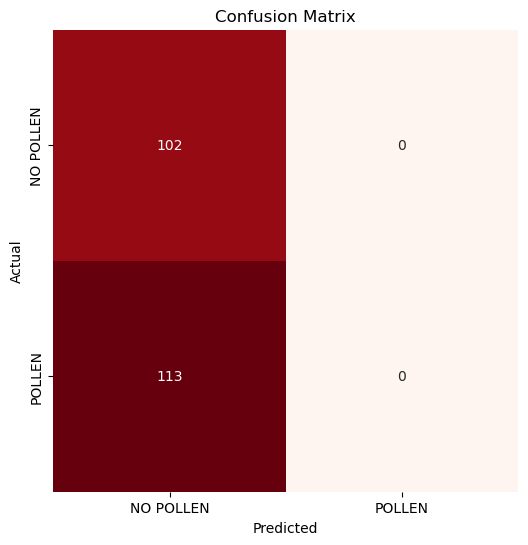

Classification Report:
----------------------
               precision    recall  f1-score   support

   NO POLLEN       0.47      1.00      0.64       102
      POLLEN       0.00      0.00      0.00       113

    accuracy                           0.47       215
   macro avg       0.24      0.50      0.32       215
weighted avg       0.23      0.47      0.31       215



In [21]:
results = model.evaluate(test_images, verbose=0)
print("Accuracy: {:.2f}%".format(results[1] * 100))

# Obtain the predicted probabilities
predicted_probs = model.predict(test_images)
# Convert probabilities to binary predictions
predictions = np.argmax(predicted_probs, axis=1)

true_labels = test_images.classes

cm = confusion_matrix(true_labels, predictions, labels=[0, 1])
clr = classification_report(true_labels, predictions, labels=[0, 1], target_names=["NO POLLEN", "POLLEN"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["NO POLLEN", "POLLEN"])
plt.yticks(ticks=[0.5, 1.5], labels=["NO POLLEN", "POLLEN"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


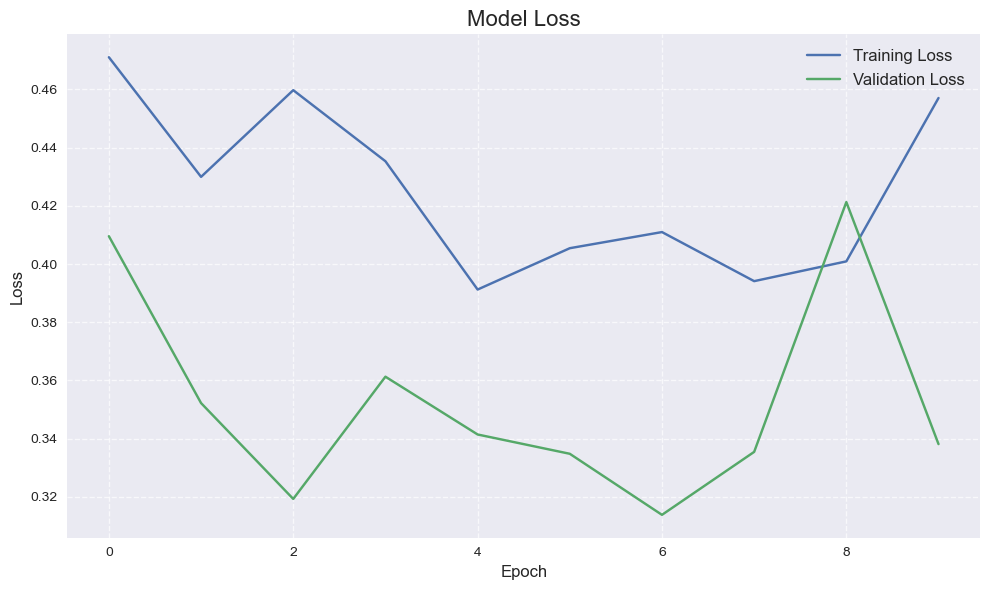

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

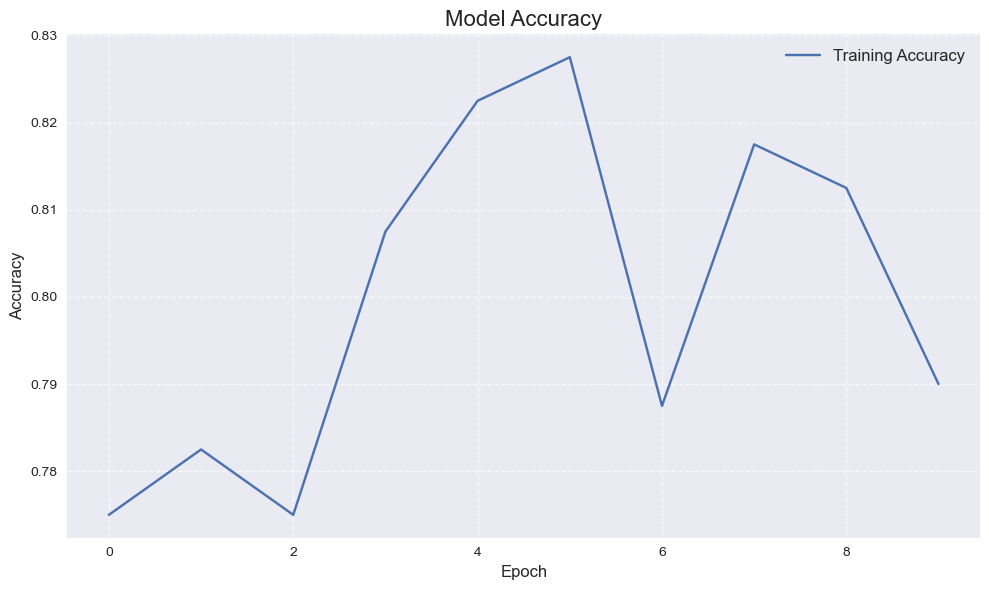

In [46]:
# Plot model accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')  
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

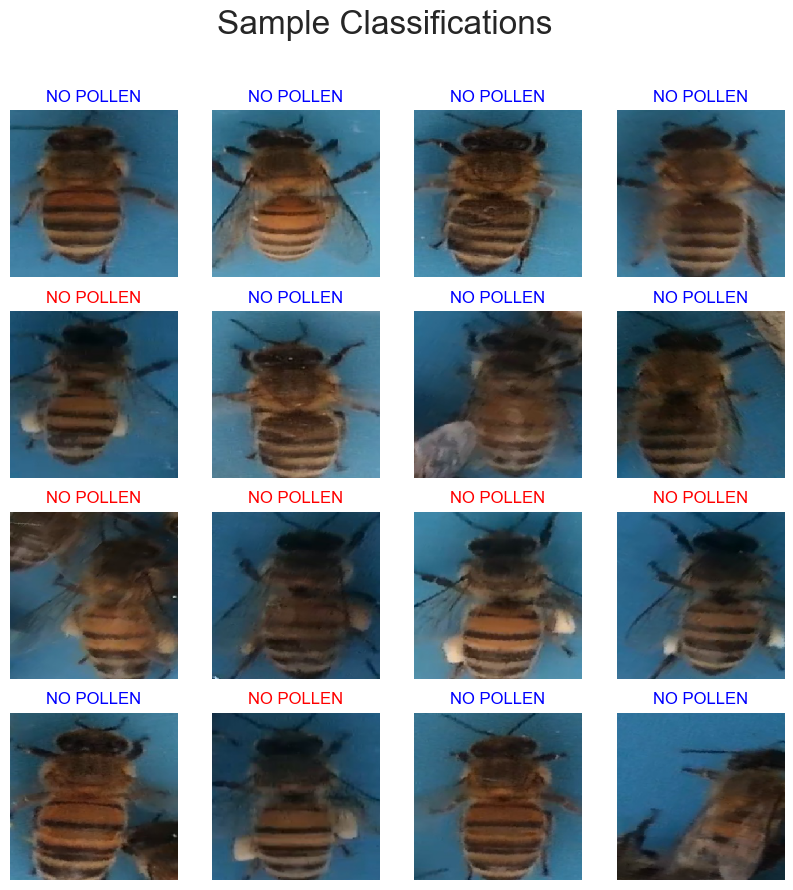

In [39]:
plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[0][0][i])
    plt.title(
        "NO POLLEN" if predictions[i] == 0 else "POLLEN",
        color='blue' if predictions[i] == test_images.labels[i] else 'red'
    )
    plt.axis('off')

plt.suptitle("Sample Classifications", size=24)
plt.show()